In [1]:
import sys, os
sys.path.insert(0, '../../../residual2vec_')

In [2]:
os.environ['DISABLE_WANDB'] = 'true'

#disable epoch level tqdm
os.environ['DISABLE_TQDM'] = 'true'

In [3]:
# standard imports
import numpy as np
import pandas as pd
import pickle as pkl
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# codebase
from utils import snakemake_utils, score


/data/sg/ashutiwa/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU: cuda:0


In [5]:

DIR = '../../../final_'
def get_embs(dataset, directory, root=DIR):
    model_to_embs = {
    "fairwalk+deepwalk": "{}/{}_fairwalk_deepwalk.npy",
    "fairwalk+node2vec": "{}/{}_fairwalk_node2vec.npy",
    "crosswalk+deepwalk": "{}/{}_crosswalk_deepwalk.npy",
    "crosswalk+node2vec": "{}/{}_crosswalk_node2vec.npy",
    "GCN+deepwalk+random": "{}/{}_gcn_deepwalk_deepwalk_embs.npy",
    "GCN+deepwalk+r2v": "{}/{}_gcn_deepwalk_r2v_embs.npy",
    "GCN+node2vec+random": "{}/{}_gcn_node2vec_deepwalk_embs.npy",
    "GCN+node2vec+r2v": "{}/{}_gcn_node2vec_r2v_embs.npy",
    "GAT+deepwalk+random": "{}/{}_gat_deepwalk_deepwalk_embs.npy",
    "GAT+deepwalk+r2v": "{}/{}_gat_deepwalk_r2v_embs.npy",
    "GAT+node2vec+random": "{}/{}_gat_node2vec_deepwalk_embs.npy",
    "GAT+node2vec+r2v": "{}/{}_gat_node2vec_r2v_embs.npy",
    "deepwalk": "{}/{}_deepwalk.npy",
    "node2vec": "{}/{}_node2vec.npy",
    "residual2vec": "{}/{}_residual2vec_embs.npy",
    "baseline+deepwalk": "{}/{}_baseline_man_woman+deepwalk_embs.npy",
    "baseline+node2vec": "{}/{}_baseline_man_woman+node2vec_embs.npy",}
    
    
    folder = root + '/' + dataset + '/' + dataset + '_' + directory
    ret = {}
    for i in model_to_embs:
        ret[i] = np.load(model_to_embs[i].format(folder, dataset))
        
        
    return ret



In [6]:
dataset = "twitch"
embs_airport_1 = get_embs(dataset, 'one')
embs_airport_2 = get_embs(dataset, 'two')
embs_airport_3 = get_embs(dataset, 'three')

embs_airport_4 = get_embs(dataset, 'four')

embs_airport_5 = get_embs(dataset, 'five')


y = snakemake_utils.get_dataset(dataset).get_grouped_col()
N = y.shape[0]





# g = sns.FacetGrid(data=df, col="model", hue="model", row="dataset")
# g.map(sns.displot, x="scores")

Extracting /tmp/large_twitch_edges.csv.zip
Extracting /tmp/large_twitch_features.csv.zip


In [7]:
df = []
df.append(pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_1["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_2["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_2["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_3["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_3["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_4["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_4["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_5["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_5["GAT+deepwalk+r2v"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['gat'] * 10 * N
    
})
      )
df.append(
    pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_1["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_2["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_2["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_3["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_3["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_4["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_4["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_5["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_5["GCN+deepwalk+r2v"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['gcn'] * 10 * N
    
    
    
})
    )

df.append(
    pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_1["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_2["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_2["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_3["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_3["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_4["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_4["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_5["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_5["residual2vec"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['word2vec'] * 10 * N
    
    
    
})
)
df = pd.concat(df, axis=0, ignore_index=True)

df.shape


100%|█| 168114/168114 [01:03<00:00, 2633.17
100%|█| 168114/168114 [01:03<00:00, 2644.47
100%|█| 168114/168114 [01:03<00:00, 2640.69
100%|█| 168114/168114 [01:03<00:00, 2641.45
100%|█| 168114/168114 [01:03<00:00, 2651.87
100%|█| 168114/168114 [01:03<00:00, 2642.47
100%|█| 168114/168114 [01:04<00:00, 2624.40
100%|█| 168114/168114 [01:03<00:00, 2653.18
100%|█| 168114/168114 [01:03<00:00, 2657.70
100%|█| 168114/168114 [01:03<00:00, 2660.96
100%|█| 168114/168114 [01:03<00:00, 2657.04
100%|█| 168114/168114 [01:03<00:00, 2639.24
100%|█| 168114/168114 [01:03<00:00, 2639.64
100%|█| 168114/168114 [01:03<00:00, 2643.38
100%|█| 168114/168114 [01:03<00:00, 2643.24
100%|█| 168114/168114 [01:03<00:00, 2632.78
100%|█| 168114/168114 [01:03<00:00, 2658.11
100%|█| 168114/168114 [01:03<00:00, 2648.04
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168114/168114 [01:03<00:00, 2657.14it/s]


(5043420, 4)

In [8]:
df.head()

,disparity per node,model,run,architecture
0,0.133804,baseline,one,gat
1,0.233008,baseline,one,gat
2,0.134048,baseline,one,gat
3,0.155992,baseline,one,gat
4,0.148620,baseline,one,gat


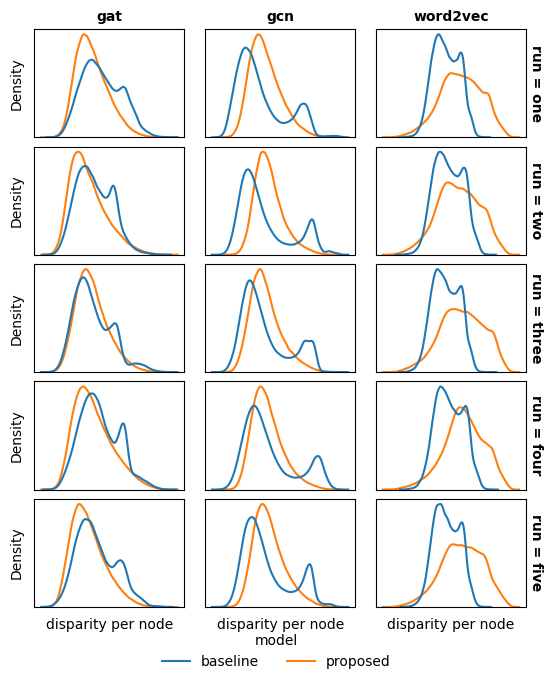

In [9]:
g = sns.displot(data=df, x="disparity per node", kind='kde', hue='model', row="run", 
                col='architecture',
                facet_kws=dict(sharey=False, sharex=False, margin_titles=True, despine=False))
g.fig.set_size_inches(6, 6)
g.set_titles(col_template="{col_name}", fontweight='bold', )
for (i,j,k), data in g.facet_data():
    ax = g.facet_axis(i, j)
    ax.set_yticks([])
    ax.set_xticks([])
#     ax.set_title(str(i) + '_' + str(j))
# sns.move_legend(g, "bottom", bbox_to_anchor=(.55, .45), frameon=False)
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.1), ncol=2)

In [10]:
for arch in ['gat', 'gcn', 'word2vec']:
    for r in ['one', 'two', 'three', 'four', 'five']:
        
        baseline_scores = df[(df.run == r) & (df.architecture == arch) & (df.model == 'baseline')]['disparity per node'].values
        proposed_scores = df[(df.run == r) & (df.architecture == arch) & (df.model == 'proposed')]['disparity per node'].values
        print(arch, r, baseline_scores.shape, proposed_scores.shape)
        score = ((baseline_scores - proposed_scores) > 0).sum() / baseline_scores.shape[0]
        print(score)
#         print(proposed_scores - baseline_scores)
        

gat one (168114,) (168114,)
0.6569649166636925
gat two (168114,) (168114,)
0.6213224359660706
gat three (168114,) (168114,)
0.5013740675969878
gat four (168114,) (168114,)
0.6039235280821348
gat five (168114,) (168114,)
0.6354438059887934
gcn one (168114,) (168114,)
0.3769584924515507
gcn two (168114,) (168114,)
0.3376815732181734
gcn three (168114,) (168114,)
0.4240634331465553
gcn four (168114,) (168114,)
0.4745053951485302
gcn five (168114,) (168114,)
0.40035928001237253
word2vec one (168114,) (168114,)
0.3113185100586507
word2vec two (168114,) (168114,)
0.3787192024459593
word2vec three (168114,) (168114,)
0.3044481720737119
word2vec four (168114,) (168114,)
0.3148458783920435
word2vec five (168114,) (168114,)
0.30542370058412743


In [11]:
# polbook => one
# polblog => one
# airport => five
# twitch => 